# Title: Attention-based LSTM for Aspect-level Sentiment Classification

#### Members' Names or Individual's Name: Sabrina Angco Kritika Chhabra

####  Emails: sabrina.angco@ryerson.ca, kritika.chhabra@ryerson.ca 

# Introduction:

#### Problem Description:

Sentiment Analysis is an important task in Natural Language Processing and is applied in multiple areas. Sentiment analysis can help identify the sentiment behind an opinion or statement. This task works in the setting that the given text has only one aspect and polarity. However, there might be several aspects that have triggered the identified sentiment. For instance,  “Staffs are not that friendly, but the taste covers all.” will be positive if the aspect is food but negative when considering the aspect service. Polarity could be opposite when different aspects are considered.  Thus, we need to explore the connection between an aspect and the content of a sentence. We study the approach of using an Attention-based Long Short-Term Memory Network for aspect-level sentiment classification.


#### Context of the Problem:

Aspect-level sentiment classification is a fine- grained task in sentiment analysis, it categorizes data by aspect and identifies the sentiment attributed to each one. The sentiment polarity of a sentence is not only determined by the content but is also related to the concerned aspect.  An example of this is: “The appetizers are ok, but the service is slow.”, for the aspect taste, the polarity is positive while for service, the polarity is negative.
Therefore, Wang et al [12] to explore the connection between an aspect and the content of a sentence. They propose an Attention-based Long Short-Term Memory Network for aspect-level sentiment classification. The attention mechanism can concentrate on different parts of a sentence when different aspects are taken as input.

#### Limitation About other Approaches:

Specifically Wang et al [12] used the work completed by Tang et al [11]  as a benchmark. Tang et al [11]  used TD-LSTM and TC-LSTM networks in aspect level sentiment analysis. Wang et al [12] determined that the TD and TC LSTM networks gave suboptimal performance as these networks took the average of the word embeddings of a target phrase, which is not sufficient to represent the semantics of the target phrase.

#### Solution:

We will study a method based on an attention mechanism, which lets the model focus on the important part of a sentence,  relevant to a specific aspect. An aspect-to-sentence attention mechanism is designed that can concentrate on the key part of a sentence given the aspect.  Also, the method explores the potential correlation of aspect and sentiment polarity in aspect-level sentiment classification. 

# Background


The background literature has been split into two tables: Sentiment classification at aspect level and Sentiment classification with neural networks.


#### Sentiment classification at aspect level
 
| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Rao and Ravichandran et al. [7] | Semi-supervised polarity lexicon induction |  General Inquirer - lexicon of English words hand-labeled with categorical information along several dimensions|Results are to dependent on the quality of features
| Perez-Rosas et al. [5] | Learning Sentiment Lexicons in Spanish| Spanish WordNet | Feature engineering used is labour intensive
| Kaji and Kitsuregawa [2] | Built lexicon for sentiment analysis frommassive collection of HTML documents|  Japanese HTML document | Had to use a massive collection of HTML documents inorder to ontain good results
| Mullen and Collier [4] | Used sentiment  analysis  using  support  vector machines (SVM) with diverse information sources| Positive and negative movie reviews and record reviews from the Pitchfork Media online record review publication, which were topic-annotated by hand | These models can be expanded with features representing other other types of semantic annotation in order to improve results

Common weakness among all the above papers:
Most of the current approaches attempt to detect the polarity of the entire sentence, regardless of the entities mentioned or aspects. These studies focus on building sentiment classifiers with features, which include bag-of-words and sentiment lexicons. In addition, these papers highly depend on the quality of features.
#### Sentiment classification with neural networks

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Mikolov et al. [3] | Gave a simple and effective approach to learn distributed representations and they found that neural networks advance sentiment analysis substantially. |  Semantic questions and syntactic questions | Simple neural network approach which has room for improvement
| Socher et al. [8] | Used semi-supervised   recursive   autoencoders for predicting sentiment distributions| Unlabeled corpus of the English Wikipedia | Is able to outperform sentiment lexica in tasks involving complex broad-range human sentiment, but only by a small percentage - therefore should look at other types of modelling.
| Socher et al. [9] | Implemented a Recursive Neural Tensor Network for sentiment analysis| Sentiment Treebank | Model only works for positive and negative sentiments, not neutral.
| Tai et al. [10] | Applied LSTMs, specifically tree-LSTMs into sentiment analysis. Tree-based LSTMs proved to be effective, since they utilize syntax structures of sentences. | Sentences drawn from movie reviews | The tree bsaed methods suffer from syntax parsing errors
| Tang et al. [11] | Introduced TD-LSTM which took target information into consideration, for target-dependent sentiment classification. Additionally introduced TC- LSTM which obtained a target vector by averaging the vectors of words that the target phrase contains| Movie review dataset from IMDB and restaurant review datasets from Yelp | LSTM networks were not sufficient to represent the semantics of the target phrase.
| Wang et al. [12] |They propose an Attention-based Long Short-Term Memory Network for aspect-level sentiment classification. The attention mechanism can concentrate on different parts of a sentence when different aspects are taken as input | Restaurant and laptop reviews [6] | Current models do not model more than one aspect simultaneously with the attention mechanism.

In our work we have modeled the ATAE LSTM network proposed by Wang et al. [12], and have done various hyper parameter searches to determine if different optimizers, initilizers, batchsizes and training methods would give similar or better restults than obtained by Wang et al [12]. In addition, we also modelled the TC and TD LSTM networks proposed by Tang et al. [11] to use as a baseline comparison to the ATAE LSTM network.

# Methodology


### LSTM Network

Long Short Term Memory networks are a special kind of RNN, capable of learning long-term dependencies. It was introduced by Hochreiter et al [1]. Primarily, LSTM solves the vanishing gradient problem in backpropagation. LSTMs use a gating mechanism that controls the memoizing process. In the LSTM architecture, there are three gates and a cell memory state. Information in LSTMs is stored, written, or read via gates (input gate, Output gate and, forget gate) that open and close. Figure below illustrates the architecture of LSTM.

### TC LSTM
This model extends TD-LSTM by incorporating a target connection component, which explicitly utilizes the connections between the target word and each context word when composing the representation of a sentence. The difference is that in TC-LSTM the input at each position is the concatenation of word embedding and target vector target, while in TD-LSTM the input at each position only includes the embedding of the current word. We also compared the performance of ATAE LSTM with TC-LSTM.

### TD LSTM
We are comparing the performance of ATAE LSTM with TD-LSTM for aspect based classification. Target dependent  LSTM (TD-LSTM) proposed by Yequan Wang, treats the aspect as the target. The basic idea of it is to model the preceding and following contexts surrounding the target string so that contexts in both directions could be used as feature representations for sentiment classification. They used a bidirectional LSTM, wherein the input of LSTML is the preceding contexts plus target string, and the input of LSTMR is the following contexts plus target string.  Afterwards, they concatenate the last hidden vectors of LSTML and LSTMR, and feed them to a softmax layer to classify the sentiment polarity label. 

### ATAE LSTM


For aspect-level sentiment classification, Wang et al [12] suggests attention-based Long Short-Term Memory. ATAE LSTM model leverages both AE-LSTM and AT_LSTM model and takes the best out of both. The model makes efficient use of aspect information as aspect knowledge is crucial when classifying the polarity of one sentence's given aspect. With different aspects for the same sentence,  we may end up with opposing polarities. ATAE-LSTM suggests learning an embedding vector for each aspect. It points two ways to take into consideration aspect embedding in the model. Firstly, it concatenates the aspect vector into the sentence hidden representations for computing attention.
Secondly, it input aspect embedding into each word input vector so that the output hidden representations (h1, h2, ..., hN ) can have the information from the input aspect (VA). Furthermore, the attention mechanism applies over the hidden layer of LSTM and captures the focal part of a sentence in response to a given aspect. The attention mechanism will produce an attention weight vector α and a weighted hidden representation r.

M = tanh( [ WhH 
	     Wvva ⊗ eN ] )
         
α = softmax(w TM) 

r = HαT

The interdependence between words and the input aspect can be modelled using this approach.




In the image below we can observe that the aspect embeddings have been take as input along with the word embeddings. The output hidden representations (h) can have the information from the input aspect (va).  In the following step that computes the attention weights, the interdependence between words and the input aspect can be modeled. 




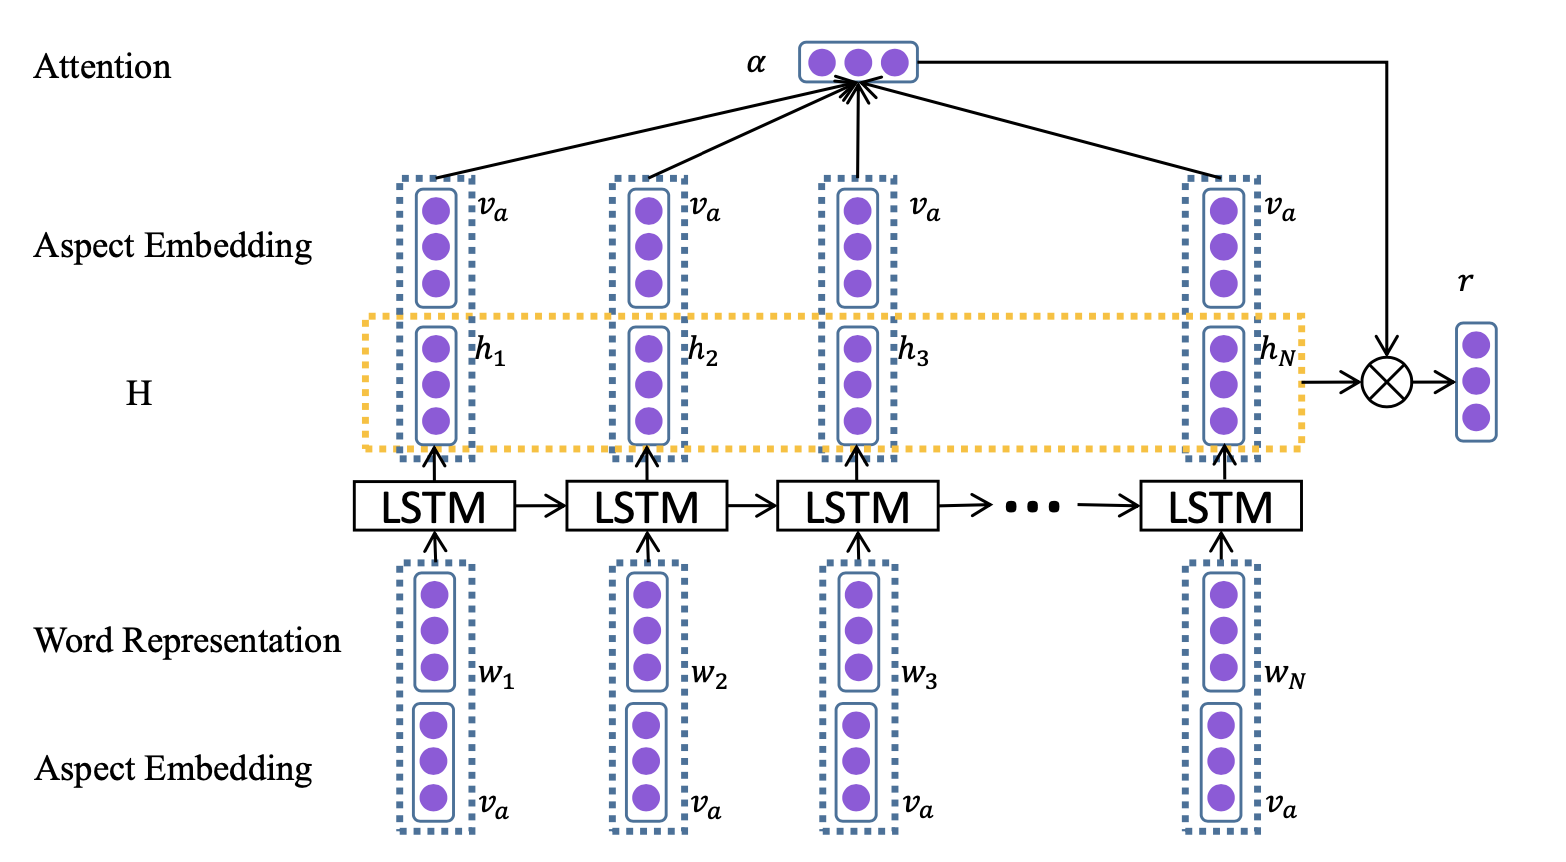

The aspect embeddings have been take as input along with the word embeddings. {w1, w2, ..., wN } represent the word vector in a sentence whose length is N . va represents the aspect embedding. is the attention weight. {h1, h2, ..., hN } is the hidden vector. [12]

# Implementation

In this section, we have included the creation of the LSTM models. First we have the basic LSTM network, then the TC and TD LSTM networks which were introduced in Tang et al [11], and finally, we have included the implementaiton for the ATAE LSTM network which was introduces in Wang et al [12].

In addition we have included how we trained our model. Here we show the k-fold cross vailidation training. In the Wang et al [12], they did not usre cross validation, but we observed that we obtained better results using a 10 fold cross validation then without cross validation.

The LSTM, TC LSTM, and TD LSTM  networks are used as a baseline in the Wang et al [12] paper. In our implementation we also used these LSTM models to compare with the ATAE network. We included a comparison of each model at the end of this section

### Libraries

In [1]:
# torch
import torch
import torch.nn as nn

# layers (find these files in src/layers)
from src.layers.dynamic_rnn import DynamicLSTM
from src.layers.attention import Attention, NoQueryAttention
from src.layers.squeeze_embedding import SqueezeEmbedding

### LSTM Models

In [2]:
# LSTM model(Baseline model)
class LSTM(nn.Module):
    def __init__(self, embedding_matrix, opt):
        super(LSTM, self).__init__()
        self.embed = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float))
        self.lstm = DynamicLSTM(opt.embed_dim, opt.hidden_dim, num_layers=1, batch_first=True)
        self.dense = nn.Linear(opt.hidden_dim, opt.polarities_dim)

    def forward(self, inputs):
        text_raw_indices = inputs[0]
        x = self.embed(text_raw_indices)
        x_len = torch.sum(text_raw_indices != 0, dim=-1)
        _, (h_n, _) = self.lstm(x, x_len)
        out = self.dense(h_n[0])
        return out

In [3]:
# TC LSTM (baseline - model introduced in Tang et al. [11])
class TC_LSTM(nn.Module):
    def __init__(self, embedding_matrix, opt):
        super(TC_LSTM, self).__init__()
        self.embed = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float))
        self.lstm_l = DynamicLSTM(opt.embed_dim * 2, opt.hidden_dim, num_layers=1, batch_first=True)
        self.lstm_r = DynamicLSTM(opt.embed_dim * 2, opt.hidden_dim, num_layers=1, batch_first=True)
        self.dense = nn.Linear(opt.hidden_dim*2, opt.polarities_dim)

    def forward(self, inputs):
        # Get the target and its length(target_len)
        x_l, x_r, target = inputs[0], inputs[1], inputs[2]
        x_l_len, x_r_len = torch.sum(x_l != 0, dim=-1), torch.sum(x_r != 0, dim=-1)
        target_len = torch.sum(target != 0, dim=-1, dtype=torch.float)[:, None, None]
        x_l, x_r, target = self.embed(x_l), self.embed(x_r), self.embed(target)
        v_target = torch.div(target.sum(dim=1, keepdim=True),
                             target_len)  # v_{target} in paper: average the target words

        # the concatenation of word embedding and target vector v_{target}:
        x_l = torch.cat(
            (x_l, torch.cat(([v_target] * x_l.shape[1]), 1)), 2)
        x_r = torch.cat(
            (x_r, torch.cat(([v_target] * x_r.shape[1]), 1)),2)

        _, (h_n_l, _) = self.lstm_l(x_l, x_l_len)
        _, (h_n_r, _) = self.lstm_r(x_r, x_r_len)
        h_n = torch.cat((h_n_l[0], h_n_r[0]), dim=-1)
        out = self.dense(h_n)
        return out

In [4]:
# TD LSTM (baseline - model introduced in Tang et al. [11])
class TD_LSTM(nn.Module):
    def __init__(self, embedding_matrix, opt):
        super(TD_LSTM, self).__init__()
        self.embed = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float))
        self.lstm_l = DynamicLSTM(opt.embed_dim, opt.hidden_dim, num_layers=1, batch_first=True)
        self.lstm_r = DynamicLSTM(opt.embed_dim, opt.hidden_dim, num_layers=1, batch_first=True)
        self.dense = nn.Linear(opt.hidden_dim*2, opt.polarities_dim)

    def forward(self, inputs):
        x_l, x_r = inputs[0], inputs[1]
        x_l_len, x_r_len = torch.sum(x_l != 0, dim=-1), torch.sum(x_r != 0, dim=-1)
        x_l, x_r = self.embed(x_l), self.embed(x_r)
        _, (h_n_l, _) = self.lstm_l(x_l, x_l_len)
        _, (h_n_r, _) = self.lstm_r(x_r, x_r_len)
        h_n = torch.cat((h_n_l[0], h_n_r[0]), dim=-1)
        out = self.dense(h_n)
        return out

In [5]:
# ATAE LSTM (Wang et al. [12])
class ATAE_LSTM(nn.Module):
    def __init__(self, embedding_matrix, opt):
        super(ATAE_LSTM, self).__init__()
        self.opt = opt
        self.embed = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float))
        self.squeeze_embedding = SqueezeEmbedding()
        self.lstm = DynamicLSTM(opt.embed_dim*2, opt.hidden_dim, num_layers=1, batch_first=True)
        self.attention = NoQueryAttention(opt.hidden_dim+opt.embed_dim, score_function='bi_linear')
        self.dense = nn.Linear(opt.hidden_dim, opt.polarities_dim)

    def forward(self, inputs):
        text_indices, aspect_indices = inputs[0], inputs[1]
        x_len = torch.sum(text_indices != 0, dim=-1)
        x_len_max = torch.max(x_len)
        aspect_len = torch.sum(aspect_indices != 0, dim=-1).float()

        x = self.embed(text_indices)
        x = self.squeeze_embedding(x, x_len)
        aspect = self.embed(aspect_indices)
        aspect_pool = torch.div(torch.sum(aspect, dim=1), aspect_len.unsqueeze(1))
        aspect = aspect_pool.unsqueeze(1).expand(-1, x_len_max, -1)
        x = torch.cat((aspect, x), dim=-1)

        h, (_, _) = self.lstm(x, x_len)
        ha = torch.cat((h, aspect), dim=-1)
        _, score = self.attention(ha)
        output = torch.squeeze(torch.bmm(score, h), dim=1)

        out = self.dense(output)
        return out

### Training the model
The k-fold cross validation file are located in src/train.

The dataset used in the training is from SemEval 2014 [6]. It consists of many customers reviews. Each review contains a list of aspects and corresponding polarities

In [6]:
# Can  run the following code to get the help information
# The hyper parameters can be added to the "%run train.py" line. 
# The defult hyper parameter argument and the other hyper parameter argument options (under help) are shown below:

%run src/train/train_k_fold_cross_val.py --help

usage: train_k_fold_cross_val.py [-h] [--model_name MODEL_NAME]
                                 [--dataset DATASET] [--optimizer OPTIMIZER]
                                 [--initializer INITIALIZER]
                                 [--learning_rate LEARNING_RATE]
                                 [--dropout DROPOUT] [--l2reg L2REG]
                                 [--num_epoch NUM_EPOCH]
                                 [--batch_size BATCH_SIZE]
                                 [--log_step LOG_STEP] [--embed_dim EMBED_DIM]
                                 [--hidden_dim HIDDEN_DIM]
                                 [--max_seq_len MAX_SEQ_LEN]
                                 [--polarities_dim POLARITIES_DIM]
                                 [--hops HOPS] [--patience PATIENCE]
                                 [--device DEVICE] [--seed SEED]
                                 [--cross_val_fold CROSS_VAL_FOLD]

optional arguments:
  -h, --help            show this help message and exit
  --

In [7]:
#Examples:

# Run lstm model with restaurant dataset, 25 epochs, and batch size of 4:
# %run src/train/train_k_fold_cross_val.py --model_name lstm --dataset restaurant --num_epoch 25  --batch_size 4

# Run TD lstm model with restaurant dataset, initializer as xavier_normal_, 25 epochs, and batch size of 4:
# %run src/train/train_k_fold_cross_val.py --model_name td_lstm --dataset laptop --initializer xavier_normal_ --num_epoch 25  --batch_size 4

In [8]:
%run src/train/train_k_fold_cross_val.py --model_name atae_lstm --dataset restaurant --num_epoch 25  --batch_size 8

loading tokenizer: src/output/train_k_fold_cross_val/restaurant_tokenizer.dat
loading embedding_matrix: src/output/train_k_fold_cross_val/300_restaurant_embedding_matrix.dat
fold : 0
>>>>>>>>>>
>>>>>>>>>>
epoch: 0
> val_acc: 0.6028, val_f1: 0.2507
> val_acc: 0.6806, val_f1: 0.5224
>>>>>>>>>>
epoch: 10
> val_acc: 0.7111, val_f1: 0.6032
> val_acc: 0.7222, val_f1: 0.6356
>>>>>>>>>>
epoch: 20
> val_acc: 0.7250, val_f1: 0.6378
>> test_acc: 0.7384, test_f1: 0.5725
fold : 1
>>>>>>>>>>
>>>>>>>>>>
epoch: 0
> val_acc: 0.7639, val_f1: 0.7021
> val_acc: 0.7583, val_f1: 0.7000
>> early stop, epoch: 6
>> test_acc: 0.7482, test_f1: 0.6062
fold : 2
>>>>>>>>>>
>>>>>>>>>>
epoch: 0
> val_acc: 0.7667, val_f1: 0.6784
> val_acc: 0.7472, val_f1: 0.6398
>> early stop, epoch: 5
>> test_acc: 0.7402, test_f1: 0.5933
fold : 3
>>>>>>>>>>
>>>>>>>>>>
epoch: 0
> val_acc: 0.7722, val_f1: 0.7086
> val_acc: 0.7583, val_f1: 0.6967
>> early stop, epoch: 5
>> test_acc: 0.7464, test_f1: 0.6153
fold : 4
>>>>>>>>>>
>>>>>>>>>>

### Results from different training hyper parameters
As previously showed, we had many different hyper parameter settings. We tested many different parameter combinations, then finally determined that using 10-fold cross validation with adam opttimizer, uniform inililizer and a batch size of 4 gave the best results

#### Hyperparameter Search

##### Initializer
The below table displays the model results using a batch size of 8 and using three different initializers: uniform, normal and orthogonal (tests were done for each optimizer and different batch sizes, this table only shows Adam and sgd for simplicity). We can observe that for each initializer the valadation accuracy and F1 score stayed the same.

| Dataset   | optimizer | initializer     | batch size | test_acc | test_f1 | time (s)    | time (min)  |
|-----------|-----------|-----------------|------------|----------|---------|-------------|-------------|
| Resaurant | Adam      | xavier_uniform_ | 16         | 0.7375   | 0.5737  | 1027.73 | 17.13 |
| Resaurant | Adam      | xavier_normal_  | 16         | 0.7375   | 0.5737  | 1221.95 | 20.37 |
| Resaurant | Adam      | orthogonal_     | 16         | 0.7375   | 0.5737  | 829.11 | 13.82 |
| Resaurant | sgd       | xavier_uniform_ | 16         | 0.6518   | 0.2734  | 900.77  | 15.01 |
| Resaurant | sgd       | xavier_normal_  | 16         | 0.6518   | 0.2734  | 1274.88 | 21.25 |
| Resaurant | sgd       | orthogonal_     | 16         | 0.6518   | 0.2734  | 851.66 | 14.19 |

##### Optimizer
The below table displays the test results using different optimizers (this table only shows the results for the batch size of 8, but in our tests we used different batch sizes). In Wang et al [12], they used AdaGrad as the optimizer, in our results we see that the Adam optimizer performs the best amoung the tested optimizers.

| Dataset   | optimizer | initializer     | batch size | test_acc | test_f1 | time (s)    | time (min)  |
|-----------|-----------|-----------------|------------|----------|---------|-------------|-------------|
| Resaurant | Adam      | xavier_uniform_ | 8          | 0.7491   | 0.6091  | 2056.12  | 34.27 |
| Resaurant | Adam      | xavier_normal_  | 8          | 0.7491   | 0.6091  | 2056.12  | 34.27 |
| Resaurant | Adam      | orthogonal_     | 8          | 0.7491   | 0.6091  | 695.61 | 11.59 |
| Resaurant | sgd       | xavier_uniform_ | 8          | 0.6518   | 0.2797  | 1091.00 | 18.18 |
| Resaurant | sgd       | xavier_normal_  | 8          | 0.6518   | 0.2797  | 941.014 | 15.68 |
| Resaurant | sgd       | orthogonal_     | 8          | 0.6518   | 0.2797  | 587.65 | 9.79 |

##### Batch Size
The below table displays the test results using different batch sizes when using the Adam optimizer and using unifrom distrobution as the inializer (since these were the best optimizer and initalizers determined in the previous tables). Here we observe that as the batch sizes decrease the accuracy and F1 scores increase.

| Dataset   | optimizer | initializer     | batch size | test_acc | test_f1 | time (s) | time (min) |
|-----------|-----------|-----------------|------------|----------|---------|----------|------------|
| Resaurant | Adam      | xavier_uniform_ | 4          | 0.7518   | 0.6275  | 5440.93  | 90.68      |
| Resaurant | Adam      | xavier_uniform_ | 8          | 0.7491   | 0.6091  | 2056.12  | 34.27      |
| Resaurant | Adam      | xavier_uniform_ | 16         | 0.7375   | 0.5737  | 1027.73  | 17.13      |
| Resaurant | Adam      | xavier_uniform_ | 32         | 0.65     | 0.2626  | 188.04   | 3.13       |
| Resaurant | Adam      | xavier_uniform_ | 64         | 0.65     | 0.2626  | 158.44   | 2.64       |

#### Model Comparison
The below table displays the test results using the ATAE LSTM, TD LSTM, TC LSTM and LSTM (using the best hyperparameters determined in the above tables). From these results we can observe that the ATAE LSTM is able to outperform the other models. Although the ATAE LSTM and TD LSTM networks have the same test accuracy, the ATAE LSTM network as a better F1 score which is optimal.

| Model     | Dataset   | optimizer | initializer     | batch size | # of epochs | test_acc | test_f1 | time (s) | time (min) |
|-----------|-----------|-----------|-----------------|------------|-------------|----------|---------|----------|------------|
| atae_lstm | Resaurant | Adam      | xavier_uniform_ | 4          | 26          | 0.7518   | 0.6275  | 5440.93  | 90.68      |
| td_lstm   | Resaurant | Adam      | xavier_uniform_ | 4          | 18          | 0.7518   | 0.5866  | 4933.27  | 82.22      |
| lstm      | Resaurant | Adam      | xavier_uniform_ | 4          | 17          | 0.7411   | 0.5277  | 3228.43  | 53.81      |
| tc_lstm   | Resaurant | Adam      | xavier_uniform_ | 4          | 19          | 0.7411   | 0.5919  | 2711.07  | 45.18      |

#### 10-fold Validation
When we used 10-fold validation, we obtained better results than the previous testing for the LSTM, TD LSTM, and ATAE LSTM networks. Whereas the TC LSTM network did not get better results using 10-fold cross validation. Additionally, we can observe that when we use 10-fold cross validation using a batch size fo 8 gives bertter results for TD and ATAE LSTM networks. The below table displays the cross validation results using the ATAE LSTM, TD LSTM, TC LSTM and LSTM (using the best hyperparameters determined in the above tables). The blue text represents the results from 10-fold corss validation. Although TD LSTM network gives a higher test accuracy over the ATAE LSTM network, we observe that the values are very similar and the ATAE LSTM network has a higher F1 score.

| Model     | Dataset   | optimizer | initializer     | batch size | test_acc | test_f1 |
|-----------|-----------|-----------|-----------------|------------|----------|---------|
| <span style="color:blue">td_lstm </span>   | <span style="color:blue">Resaurant </span>  | <span style="color:blue">Adam </span>       | <span style="color:blue">xavier_uniform_ </span>  | <span style="color:blue">8 </span>          |  <span style="color:blue">0.7562  </span>  |  <span style="color:blue">0.5853 </span>  |
| <span style="color:blue">atae_lstm </span>  | <span style="color:blue">Resaurant </span>  | <span style="color:blue">Adam </span>       | <span style="color:blue">xavier_uniform_ </span>  | <span style="color:blue">8 </span>| <span style="color:blue">0.7545 </span>    | <span style="color:blue"> 0.6152 </span>   |
| <span style="color:blue">lstm </span>       |  <span style="color:blue">Resaurant </span>  | <span style="color:blue">Adam </span>       | <span style="color:blue">xavier_uniform_ </span>  | <span style="color:blue">4 </span>          | <span style="color:blue"> 0.7527 </span>   | <span style="color:blue">0.612  </span>   |
| atae_lstm | Resaurant | Adam      | xavier_uniform_ | 4          | 0.7518   | 0.6275  |
| td_lstm   | Resaurant | Adam      | xavier_uniform_ | 4          | 0.7518   | 0.5866  |
| atae_lstm | Resaurant | Adam      | xavier_uniform_ | 8          | 0.7491   | 0.6091  |
| td_lstm   | Resaurant | Adam      | xavier_uniform_ | 8          | 0.7491   | 0.5734  |
| lstm      | Resaurant | Adam      | xavier_uniform_ | 8          | 0.7482   | 0.5938  |
| <span style="color:blue">atae_lstm </span>  | <span style="color:blue">Resaurant </span>  | <span style="color:blue">Adam </span>       | <span style="color:blue">xavier_uniform_ </span>  | <span style="color:blue">4 </span>| <span style="color:blue">0.7473 </span>   | <span style="color:blue">0.6143 </span>   |
| <span style="color:blue">td_lstm </span>   | <span style="color:blue">Resaurant </span>  | <span style="color:blue">Adam </span>       | <span style="color:blue">xavier_uniform_ </span>  | <span style="color:blue">4 </span>| <span style="color:blue">0.7464 </span>   | <span style="color:blue">0.5889  </span> |
| <span style="color:blue">lstm </span>       | <span style="color:blue">Resaurant </span>  | <span style="color:blue">Adam </span>       | <span style="color:blue">xavier_uniform_ </span>  | <span style="color:blue">8 </span>| <span style="color:blue">0.7438   </span> |<span style="color:blue">  0.5973 </span>   |
| tc_lstm   | Resaurant | Adam      | xavier_uniform_ | 4          | 0.7411   | 0.5919  |
| lstm      | Resaurant | Adam      | xavier_uniform_ | 4          | 0.7411   | 0.5277  |
| tc_lstm   | Resaurant | Adam      | xavier_uniform_ | 4          | 0.7393   | 0.595   |
| <span style="color:blue">tc_lstm </span>    | <span style="color:blue">Resaurant </span>  | <span style="color:blue">Adam </span>       | <span style="color:blue">xavier_uniform_ </span>  | <span style="color:blue">8 </span>| <span style="color:blue">0.7357   </span>   | <span style="color:blue">0.5718  </span>  |
| <span style="color:blue">tc_lstm </span>    | <span style="color:blue">Resaurant </span>  | <span style="color:blue">Adam </span>       | <span style="color:blue">xavier_uniform_ </span>  | <span style="color:blue">8 </span>| <span style="color:blue">0.7339 </span>    | <span style="color:blue">0.587  </span>   |

### Example

In the following example, we are testing our best performing modeland determining the sentiment on a defined aspect

In [9]:
from src.model_execution_examples.infer_example import *

We test the same sentence, and determine the polarity of the sentiment with different aspects

Sentence: "The good price, but the service is bad"

Aspect: "service"

Our results show that the aspect "service" is negative (-1), which is correct. 

The following array, [[0.45459822 0.10945854 0.4359433 ]], represents the models certainty of which polarity the aspect is (negative, neutral, positive, repsectively)

In [10]:
run_infer_example("The good price, but the service is bad", "service",  n_model = 'atae_lstm', n_dataset = 'restaurant', model_file = 'atae_lstm_restaurant_val_acc_0.7889')

loading tokenizer: restaurant_tokenizer.dat
loading embedding_matrix: 300_restaurant_embedding_matrix.dat
loading model atae_lstm ...
[[0.45459822 0.10945854 0.4359433 ]]
[-1]


Sentence: "The good price, but the service is bad"
Aspect: "price"

Our results show that the aspect "price" is positive (1), which is correct

In [11]:
run_infer_example("The good price, but the service is bad", "price",  n_model = 'atae_lstm', n_dataset = 'restaurant', model_file = 'atae_lstm_restaurant_val_acc_0.7889')

loading tokenizer: restaurant_tokenizer.dat
loading embedding_matrix: 300_restaurant_embedding_matrix.dat
loading model atae_lstm ...
[[0.3804925  0.08518808 0.5343194 ]]
[1]


# Conclusion and Future Direction

In this paper, they proposed attention-based LSTMs for aspect-level sentiment classification - in order to learn aspect embeddings and let aspects participate in computing attention weights. The models proposed concentrated on different parts of a sentence when different aspects are given so that they are more competitive for aspect-level classification. ATAE-LSTM obtains better performance over the baseline models. ATAE- LSTM not only addresses the shortcoming of the unconformity between word vectors and aspect embeddings, but also can capture the most important information in response to a given aspect. In addition, ATAE-LSTM can capture the important and different parts of a sentence when given different aspects. 

# References:

[1] Sepp Hochreiter and Jürgen Schmidhuber. Long short-term memory.Neural computation, 9(8):1735–1780, 1997.

[2] Nobuhiro Kaji and Masaru Kitsuregawa. Building lexicon for sentiment analysis from massive collection ofhtml documents. InProceedings of the 2007 joint conference on empirical methods in natural languageprocessing and computational natural language learning (EMNLP-CoNLL), pages 1075–1083, 2007.

[3] Tomas Mikolov, Kai Chen, Greg Corrado, and Jeffrey Dean. Efficient estimation of word representations invector space.arXiv preprint arXiv:1301.3781, 2013.

[4]   Tony Mullen and Nigel Collier. Sentiment analysis using support vector machines with diverse informationsources. InProceedings of the 2004 conference on empirical methods in natural language processing,pages 412–418, 2004.

[5]   Veronica Perez-Rosas, Carmen Banea, and Rada Mihalcea. Learning sentiment lexicons in spanish. InLREC, volume 12, page 73. Citeseer, 2012.

[6]   Maria Pontiki, Dimitrios Galanis, Haris Papageorgiou, Ion Androutsopoulos, Suresh Manandhar,Mohammad Al-Smadi, Mahmoud Al-Ayyoub, Yanyan Zhao, Bing Qin, Orphée De Clercq, et al.Semeval-2016 task 5: Aspect based sentiment analysis. InInternational workshop on semanticevaluation, pages 19–30, 2016.

[7]   Delip Rao and Deepak Ravichandran. Semi-supervised polarity lexicon induction. InProceedings of the12th Conference of the European Chapter of the ACL (EACL 2009), pages 675–682, 2009.

[8]   Richard Socher, Jeffrey Pennington, Eric H Huang, Andrew Y Ng, and Christopher D Manning.Semi-supervised recursive autoencoders for predicting sentiment distributions. InProceedings of the2011 conference on empirical methods in natural language processing, pages 151–161, 2011

[9]   Richard Socher, Alex Perelygin, Jean Wu, Jason Chuang, Christopher D Manning, Andrew Y Ng, andChristopher Potts. Recursive deep models for semantic compositionality over a sentiment treebank. InProceedings of the 2013 conference on empirical methods in natural language processing, pages1631–1642, 2013.

[10]   Kai Sheng Tai, Richard Socher, and Christopher D Manning. Improved semantic representations fromtree-structured long short-term memory networks.arXiv preprint arXiv:1503.00075, 2015.

[11]   Duyu Tang, Bing Qin, and Ting Liu. Document modeling with gated recurrent neural network for sentimentclassification. InProceedings of the 2015 conference on empirical methods in natural languageprocessing, pages 1422–1432, 2015.

[12]   Yequan Wang, Minlie Huang, Xiaoyan Zhu, and Li Zhao. Attention-based lstm for aspect-level sentimentclassification. InProceedings of the 2016 conference on empirical methods in natural languageprocessing, pages 606–615, 2016